In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize
import warnings
from google.colab import files
from math import sqrt

warnings.filterwarnings(action='ignore')

In [ ]:
eps = 0.001
cubs_section = np.arange(0, 1+eps, eps)
abs_section = np.arange(0, 1+eps, eps)
sinus_section = np.arange(0.01, 1+eps, eps)

def cubs(x):
    return x ** 3

def _abs_(x):
    return np.absolute(x - 0.2)

def sinus(x):
    return x * np.sin(1/x)

def plot(x, y, label):
    plt.plot(x, y, c='b')

    ax = plt.gca()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(label)

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()


def brute_force_method(func, func_section):
    iter_count = 0
    x_min = func_section[0]
    func_min_value = func(x_min)
    for i in np.arange(func_section[0], func_section[-1] + eps, eps):
        if func(i) < func_min_value:
            func_min_value = func(i)
            x_min = i
        iter_count += 1
    return x_min, func_min_value, iter_count


def dichotomy_method(func, func_section):
    iter_count = 0
    delta = eps/2
    low = func_section[0]
    high = func_section[-1]
    while (high - low)/2 >= eps:
        x_low = (high + low - delta)/2
        x_high = (high + low + delta)/2
        if func(x_low) <= func(x_high):
            high = x_high
        else:
            low = x_low
        iter_count += 1
    x_min = np.around((low + high)/2, decimals=len(str(eps * 1000)))
    func_min_value = func(x_min)
    return x_min, func_min_value, iter_count


def golden_section_method(func, func_section):
    iter_count = 0
    a = func_section[0]
    b = func_section[-1]
    x1 = a + ((3 - sqrt(5))/2) * (b - a)
    x2 = a + ((sqrt(5) - 1) / 2) * (b - a)
    tay = (sqrt(5) - 1)/2
    eps_n = (b - a)/2
    f_x1 = func(x1)
    f_x2 = func(x2)
    while eps_n > eps:
        if f_x1 <= f_x2:
            b = x2
            x2 = x1
            f_x2 = f_x1
            x1 = b - tay * (b - a)
            f_x1 = func(x1)
        else:
            a = x1
            x1 = x2
            f_x1 = f_x2
            x2 = b - tay * (b - a)
            f_x2 = func(x2)
        eps_n *= tay
        iter_count += 1
    x_min = np.around((a + b)/2, decimals=len(str(eps * 1000)))
    func_min_value = func(x_min)
    return x_min, func_min_value, iter_count

In [ ]:
func_array = [cubs, _abs_, sinus]
func_names = ['Cube', 'Absolute', 'Sine']
func_section_array = [cubs_section, abs_section, sinus_section]
for i in range(len(func_array)):
    x1, f_v_1, i_1 = brute_force_method(func_array[i], func_section_array[i])
    x2, f_v_2, i_2 = dichotomy_method(func_array[i], func_section_array[i])
    x3, f_v_3, i_3 = golden_section_method(func_array[i], func_section_array[i])
    print(f'Brute-Force Method for {func_names[i]} function:'
          f'\nX min = {round(x1, 4)}, F(X min) = {round(f_v_1, 4)}, Number of iterations = {i_1}.'
          f'\nDichotomy Method for {func_names[i]} function:'
          f'\nX min = {round(x2, 4)}, F(X min) = {round(f_v_3, 4)}, Number of iterations = {i_2}.'
          f'\nGolden Section Method for {func_names[i]} function:'
          f'\nX min = {round(x3, 4)}, F(X min) = {round(f_v_3, 4)}, Number of iterations = {i_3}.')
    print()

Brute-Force Method for Cube function:
X min = 0.0, F(X min) = 0.0, Number of iterations = 1001.
Dichotomy Method for Cube function:
X min = 0.001, F(X min) = 0.0, Number of iterations = 10.
Golden Section Method for Cube function:
X min = 0.001, F(X min) = 0.0, Number of iterations = 13.

Brute-Force Method for Absolute function:
X min = 0.2, F(X min) = 0.0, Number of iterations = 1001.
Dichotomy Method for Absolute function:
X min = 0.2, F(X min) = 0.064, Number of iterations = 10.
Golden Section Method for Absolute function:
X min = 0.264, F(X min) = 0.064, Number of iterations = 13.

Brute-Force Method for Sine function:
X min = 0.223, F(X min) = -0.2172, Number of iterations = 991.
Dichotomy Method for Sine function:
X min = 0.222, F(X min) = -0.1994, Number of iterations = 10.
Golden Section Method for Sine function:
X min = 0.244, F(X min) = -0.1994, Number of iterations = 13.



Brute-Force Method for Cubic Function:
X min = 0.0, F(X min) = 0.0, Number of iterations = 1001.
Dichotomy Method for Cubic Function:
X min = 0.001, F(X min) = 0.0, Number of iterations = 10.
Golden Section Method for Cubic Function:
X min = 0.001, F(X min) = 0.0, Number of iterations = 13.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

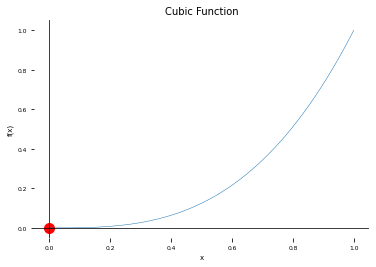

In [ ]:
x1, f_v_1, i_1 = brute_force_method(cubs, cubs_section)
x2, f_v_2, i_2 = dichotomy_method(cubs, cubs_section)
x3, f_v_3, i_3 = golden_section_method(cubs, cubs_section)
print(f'Brute-Force Method for Cubic Function:'
      f'\nX min = {round(x1, 4)}, F(X min) = {round(f_v_1, 4)}, Number of iterations = {i_1}.'
      f'\nDichotomy Method for Cubic Function:'
      f'\nX min = {round(x2, 4)}, F(X min) = {round(f_v_3, 4)}, Number of iterations = {i_2}.'
      f'\nGolden Section Method for Cubic Function:'
      f'\nX min = {round(x3, 4)}, F(X min) = {round(f_v_3, 4)}, Number of iterations = {i_3}.')
print()

fig, ax = plt.subplots()
ax.plot(cubs_section, [cubs(i) for i in cubs_section], linewidth=0.5)
ax.scatter(x1, f_v_1, s=100, c='red')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_title('Cubic Function', fontsize=10, loc='center')
ax.set_xlabel('x', fontsize=7)
ax.set_ylabel('f(x)', fontsize=7)
ax.axvline(x=0, color='black', linewidth=0.75)
ax.axhline(y=0, color='black', linewidth=0.75)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('cubic_function.png', dpi = 200, bbox_inches="tight")
files.download('cubic_function.png')

Brute-Force Method for Absolute Function:
X min = 0.2, F(X min) = 0.0, Number of iterations = 1001.
Dichotomy Method for Absolute Function:
X min = 0.2, F(X min) = 0.064, Number of iterations = 10.
Golden Section Method for Absolute Function:
X min = 0.264, F(X min) = 0.064, Number of iterations = 13.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

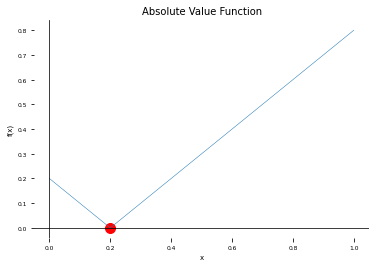

In [ ]:
x1, f_v_1, i_1 = brute_force_method(_abs_, abs_section)
x2, f_v_2, i_2 = dichotomy_method(_abs_, abs_section)
x3, f_v_3, i_3 = golden_section_method(_abs_, abs_section)
print(f'Brute-Force Method for Absolute Function:'
      f'\nX min = {round(x1, 4)}, F(X min) = {round(f_v_1, 4)}, Number of iterations = {i_1}.'
      f'\nDichotomy Method for Absolute Function:'
      f'\nX min = {round(x2, 4)}, F(X min) = {round(f_v_3, 4)}, Number of iterations = {i_2}.'
      f'\nGolden Section Method for Absolute Function:'
      f'\nX min = {round(x3, 4)}, F(X min) = {round(f_v_3, 4)}, Number of iterations = {i_3}.')
print()

fig, ax = plt.subplots()
ax.plot(abs_section, [_abs_(i) for i in abs_section], linewidth=0.5)
ax.scatter(x2, f_v_2, s=100, c='red')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_title('Absolute Value Function', fontsize=10, loc='center')
ax.set_xlabel('x', fontsize=7)
ax.set_ylabel('f(x)', fontsize=7)
ax.axvline(x=0, color='black', linewidth=0.75)
ax.axhline(y=0, color='black', linewidth=0.75)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('absolute_function.png', dpi = 200, bbox_inches="tight")
files.download('absolute_function.png')

Brute-Force Method for Sine Function:
X min = 0.223, F(X min) = -0.2172, Number of iterations = 991.
Dichotomy Method for Sine Function:
X min = 0.222, F(X min) = -0.1994, Number of iterations = 10.
Golden Section Method for Sine Function:
X min = 0.244, F(X min) = -0.1994, Number of iterations = 13.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

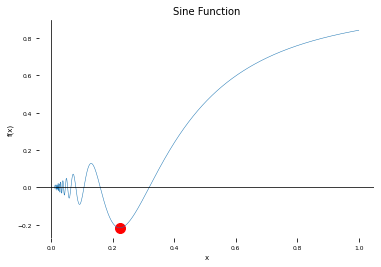

In [ ]:
x1, f_v_1, i_1 = brute_force_method(sinus, sinus_section)
x2, f_v_2, i_2 = dichotomy_method(sinus, sinus_section)
x3, f_v_3, i_3 = golden_section_method(sinus, sinus_section)
print(f'Brute-Force Method for Sine Function:'
      f'\nX min = {round(x1, 4)}, F(X min) = {round(f_v_1, 4)}, Number of iterations = {i_1}.'
      f'\nDichotomy Method for Sine Function:'
      f'\nX min = {round(x2, 4)}, F(X min) = {round(f_v_3, 4)}, Number of iterations = {i_2}.'
      f'\nGolden Section Method for Sine Function:'
      f'\nX min = {round(x3, 4)}, F(X min) = {round(f_v_3, 4)}, Number of iterations = {i_3}.')
print()

fig, ax = plt.subplots()
ax.plot(sinus_section, [sinus(i) for i in sinus_section], linewidth=0.5)
ax.scatter(x2, f_v_2, s=100, c='red')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_title('Sine Function', fontsize=10, loc='center')
ax.set_xlabel('x', fontsize=7)
ax.set_ylabel('f(x)', fontsize=7)
ax.axvline(x=0, color='black', linewidth=0.75)
ax.axhline(y=0, color='black', linewidth=0.75)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('sine_function.png', dpi = 200, bbox_inches="tight")
files.download('sine_function.png')

In [17]:
alpha = np.random.random()
beta = np.random.random()
noise = np.random.normal(0, 1, 100)
epsilon = 0.001

print(f'alpha = {alpha}, beta = {beta}')

x_k = np.arange(0, 1, 0.01)
y_ = [alpha * x_k[k] + beta for k in range(len(x_k))]
y_k = [alpha * x_k[k] + beta + noise[k] for k in range(len(x_k))]

def linear_approximant(x, a, b):
    return a * x + b

def rational_approximant(x, a, b):
    return a / (1 + b * x)

def least_squares_function(x, function):
    amount = 0
    for i in range(100):
        amount = amount + np.power(function(x_k[i], x[0], x[1]) - y_k[i], 2)
    return amount

alpha = 0.1812358427705424, beta = 0.8063775541882271


Generative line
alpha = 0.1812358427705424, beta = 0.8063775541882271


Linear approximate
Brute force search arguments: -0.092, 0.957
Number of iterations: 1000000
Number of function evaluations: 1000000


Gauss search arguments: -0.092, 0.957
Number of iterations: 13
Number of function evaluations: 75


Nelder-Mead search arguments: 0.000, 0.912
Number of iterations: 25
Number of function evaluations: 39


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generative line
alpha = 0.1812358427705424, beta = 0.8063775541882271


Rational approximate


KeyboardInterrupt: ignored

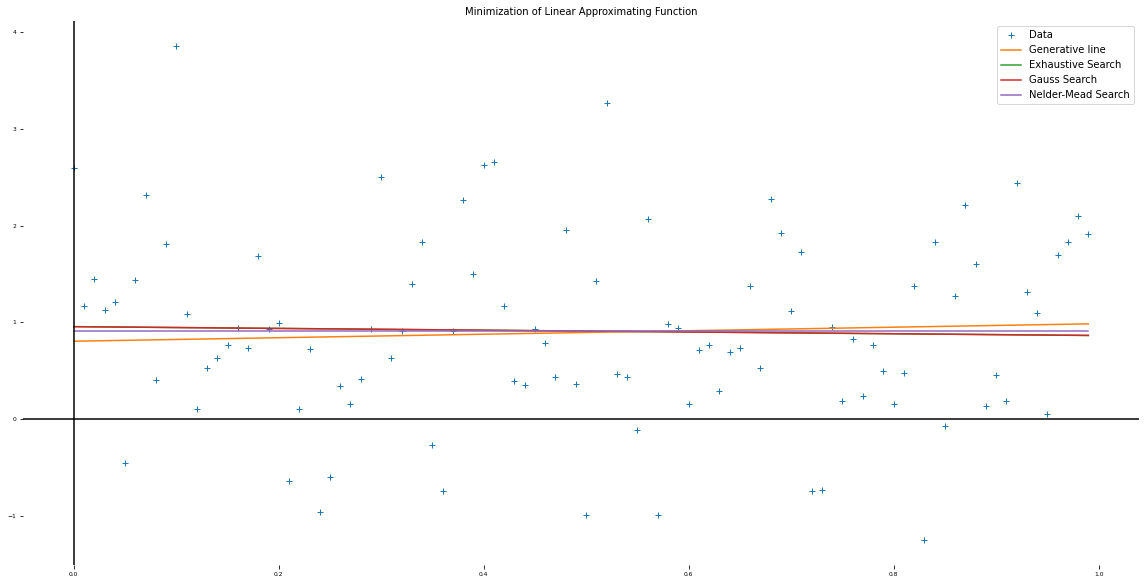

In [18]:
def brute_force_search(function, args):
    return scipy.optimize.brute(
        function,
        ranges=(slice(0, 1, epsilon), (slice(0, 1, epsilon))),
        args=(args,),
        full_output=True
    )
  

def gauss_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=[0, 0],
        bounds=[(0, 1), (0, 1)],
        method='CG',
        args=(args,)
    )

def neldermead_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=[0, 0],
        bounds=[(0, 1), (0, 1)],
        method='Nelder-Mead',
        args=(args,)
    )

print('Generative line')
print(f'alpha = {alpha}, beta = {beta}')
print('\n')

print('Linear approximate')
a_b_array, func_value, point_amount_lin, value_amount  = brute_force_search(least_squares_function, linear_approximant)
exhaustive_lower, exhaustive_higher = a_b_array[0], a_b_array[1]
sum2 = 0
for i in range(len(value_amount)):
    sum2 += len(value_amount[i])
print('Brute force search arguments: {:.3f}, {:.3f}'.format(exhaustive_lower, exhaustive_higher))
print(f'Number of iterations: {sum2}')
print(f'Number of function evaluations: {sum2}')
print('\n')

gauss_lower, gauss_higher = gauss_search(least_squares_function, linear_approximant).x
gauss_num_iter_lin = gauss_search(least_squares_function, rational_approximant).nit
gauss_func_ev_lin = gauss_search(least_squares_function, rational_approximant).nfev
print('Gauss search arguments: {:.3f}, {:.3f}'.format(gauss_lower, gauss_higher))
print(f'Number of iterations: {gauss_num_iter_lin}')
print(f'Number of function evaluations: {gauss_func_ev_lin}')
print('\n')

neldermead_lower, neldermead_higher = neldermead_search(least_squares_function, linear_approximant).x
neldermead_num_iter_lin = neldermead_search(least_squares_function, rational_approximant).nit
neldermead_func_ev_lin = neldermead_search(least_squares_function, rational_approximant).nfev
print('Nelder-Mead search arguments: {:.3f}, {:.3f}'.format(neldermead_lower, neldermead_higher))
print(f'Number of iterations: {neldermead_num_iter_lin}')
print(f'Number of function evaluations: {neldermead_func_ev_lin}')

plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

plt.plot(x_k, y_, label='Generative line')

y = [linear_approximant(x, exhaustive_lower, exhaustive_higher) for x in x_k]
plt.plot(x_k, y, label='Exhaustive Search')

y = [linear_approximant(x, gauss_lower, gauss_higher) for x in x_k]
plt.plot(x_k, y, label='Gauss Search')

y = [linear_approximant(x, neldermead_lower, neldermead_higher) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title('Minimization of Linear Approximating Function', fontsize=10, loc='center')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()

plt.savefig('linear_approx.png', dpi = 200, bbox_inches="tight")
files.download('linear_approx.png')

Generative line
alpha = 0.1812358427705424, beta = 0.8063775541882271


Rational approximate
Brute force search arguments: 0.985, 0.167
Number of iterations: 1000000
Number of function evaluations: 1000000


Gauss search arguments: 0.984925, 0.167401
Number of iterations: 13
Number of function evaluations: 75


Nelder-Mead search arguments: 1.000000, 0.000000
Number of iterations: 25
Number of function evaluations: 39


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

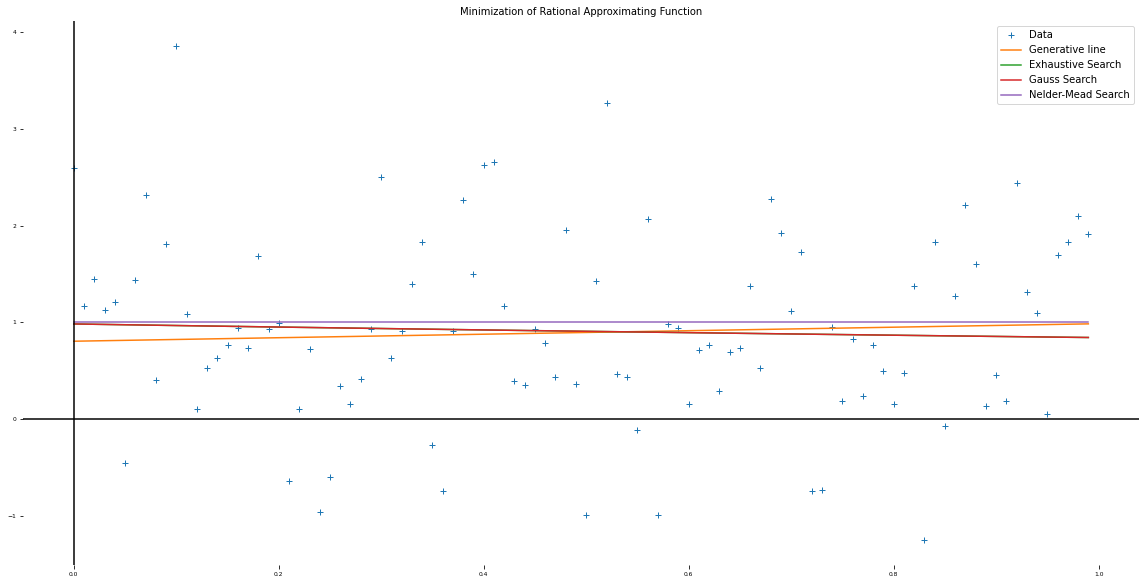

In [22]:
print('Generative line')
print(f'alpha = {alpha}, beta = {beta}')
print('\n')

print('Rational approximate')
a_b_array_r, func_value_r, point_amount_lin_r, value_amount_r  = brute_force_search(least_squares_function, rational_approximant)
exhaustive_lower, exhaustive_higher = a_b_array_r[0], a_b_array_r[1]
sum_r = 0
for i in range(len(value_amount_r)):
    sum_r += len(value_amount_r[i])
print('Brute force search arguments: {:.3f}, {:.3f}'.format(exhaustive_lower, exhaustive_higher))
print(f'Number of iterations: {sum_r}')
print(f'Number of function evaluations: {sum_r}')
print('\n')

gauss_lower, gauss_higher = gauss_search(least_squares_function, rational_approximant).x
gauss_num_iter = gauss_search(least_squares_function, rational_approximant).nit
gauss_func_ev =gauss_search(least_squares_function, rational_approximant).nfev
print('Gauss search arguments: {:.6f}, {:.6f}'.format(gauss_lower, gauss_higher))
print(f'Number of iterations: {gauss_num_iter}')
print(f'Number of function evaluations: {gauss_func_ev}')
print('\n')

neldermead_lower, neldermead_higher = neldermead_search(least_squares_function, rational_approximant).x
neldermead_num_iter = neldermead_search(least_squares_function, rational_approximant).nit
neldermead_func_ev = neldermead_search(least_squares_function, rational_approximant).nfev
print('Nelder-Mead search arguments: {:.6f}, {:.6f}'.format(neldermead_lower, neldermead_higher))
print(f'Number of iterations: {neldermead_num_iter}')
print(f'Number of function evaluations: {neldermead_func_ev}')


plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, '+', label='Data')

plt.plot(x_k, y_, label='Generative line')

y = [rational_approximant(x, exhaustive_lower, exhaustive_higher) for x in x_k]
plt.plot(x_k, y, label='Exhaustive Search')

y = [rational_approximant(x, gauss_lower, gauss_higher) for x in x_k]
plt.plot(x_k, y, label='Gauss Search')

y = [rational_approximant(x, neldermead_lower, neldermead_higher) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search')

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title('Minimization of Rational Approximating Function', fontsize=10, loc='center')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()

plt.savefig('rational_approx.png', dpi = 200, bbox_inches="tight")
files.download('rational_approx.png')